In [1]:
import pandas as pd # For loading csv file data to numpy array
import numpy as np # For using data as array
import matplotlib.pyplot as plt # For plotting graph(x,y)
from sklearn.model_selection import train_test_split # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler # To scale our data between 0 and 1 to get better accuracy
from sklearn.linear_model import LogisticRegression # For using to perform Logistic Regression
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn import metrics
from datetime import datetime # To show current data and time
print('------------------------------Logistic Regression------------------------------')
print('Name: Teli Farhana Khatoon')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T.)[Sem 2]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
#To import dataset
data=pd.read_csv('Social_Network_Ads.csv')
data.head() #To show data

------------------------------Logistic Regression------------------------------
Name: Teli Farhana Khatoon
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T.)[Sem 2]
Date and Time = 12/04/2022 23:02:38


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Confusion matrix: [[65  3]
 [ 8 24]]
Accuracy: 0.89
Precision: 0.8888888888888888
Recall: 0.75


Text(0.5, 257.44, 'Predicted label')

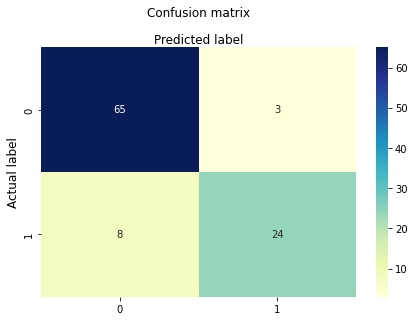

In [2]:
# Splitting Data set in Dependent and Independent variables
x = data.iloc[:, [2,3]].values # To select only Age and EstimatedSalary as independent variables
y = data.iloc[:, 4].values # To select Purchased as a dependent variable

# Splitting the Data set into the Training Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:' ,cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Visualizing Confusion Matrix using Heatmap
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)


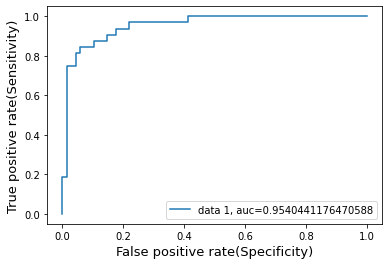

In [3]:
# Plot curve against true positive rate and false positive rate
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False positive rate(Specificity)', fontsize=13)
plt.ylabel('True positive rate(Sensitivity)', fontsize=13)
plt.show()

Link for dataset
https://gitlab.wicome.com/training/predictiveanalisys/-/blob/0d12abf158a543e85dc50f9951796063e6f59b22/notebooks/data/Social_Network_Ads.csv

https://www.marktechpost.com/2021/11/12/logistic-regression-with-a-real-world-example-in-python/

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python